In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import locale

%matplotlib inline

In [2]:
locale.setlocale(locale.LC_ALL, "en_US.UTF-8")

'en_US.UTF-8'

In [3]:
# load dataset (a dataset of crimes in massachusetts)
df = pd.read_csv("data/MA_crimes.csv")

In [4]:
df.head()

,city,population,violent_crime,murder,rape,robbery,aggravated_assault,property_crime,burglary,larceny_theft,motor_vehicle_theft,arson
0,Abington,"16,121",48,0,5.0,7,36,297,82,201,14,1.0
1,Acton,"22,871",8,0,1.0,2,5,178,31,144,3,0.0
2,Acushnet,"10,362",19,0,2.0,0,17,74,27,40,7,2.0
3,Adams,"8,352",21,0,3.0,3,15,157,40,109,8,1.0
4,Agawam,"28,659",41,0,12.0,3,26,270,105,130,35,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 12 columns):
city                   279 non-null object
population             279 non-null object
violent_crime          279 non-null object
murder                 279 non-null int64
rape                   269 non-null float64
robbery                279 non-null object
aggravated_assault     279 non-null object
property_crime         279 non-null object
burglary               279 non-null object
larceny_theft          279 non-null object
motor_vehicle_theft    279 non-null object
arson                  269 non-null float64
dtypes: float64(2), int64(1), object(9)
memory usage: 26.2+ KB


In [6]:
convert_columns = [
    "population",
    "violent_crime",
    "robbery",
    "aggravated_assault",
    "property_crime",
    "burglary",
    "larceny_theft",
    "motor_vehicle_theft"
]

In [7]:
for column in convert_columns:
    df[column] = df[column].apply(lambda number: locale.atoi(str(number)))

In [8]:
df.head()

,city,population,violent_crime,murder,rape,robbery,aggravated_assault,property_crime,burglary,larceny_theft,motor_vehicle_theft,arson
0,Abington,16121,48,0,5.0,7,36,297,82,201,14,1.0
1,Acton,22871,8,0,1.0,2,5,178,31,144,3,0.0
2,Acushnet,10362,19,0,2.0,0,17,74,27,40,7,2.0
3,Adams,8352,21,0,3.0,3,15,157,40,109,8,1.0
4,Agawam,28659,41,0,12.0,3,26,270,105,130,35,1.0


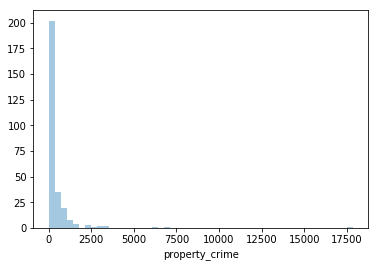

In [11]:
# define features and target
sns.distplot(df["property_crime"], kde=False)